# ELEC 677 – Network Science and Analytics – Homework 1

Due: 9/13/2018

*On my honor, I have neither given nor received any unauthorized aid on this assignment.*

Daniel LeJeune, S01276871
$\newcommand{\grenewcommand}{\renewcommand} \newcommand{\gnewcommand}{\newcommand}$ 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.style.use('notebook')

## Problem 1.1

### Part 1.1.1

#### Part a)

Using the labeling function $\grenewcommand{\vec}[1]{\mathbf{#1}} \gnewcommand{\x}{\vec{x}} \gnewcommand{\y}{\vec{y}} \gnewcommand{\z}{\vec{z}} \gnewcommand{\R}{\mathbb{R}} \gnewcommand{\T}{\mathsf{T}} \gnewcommand{\E}{\mathbb{E}} \gnewcommand{\trace}[1]{\mathrm{trace}\left(#1\right)} \ell_1$ defined by $\{(v, \ell_1(v) : v \in V)\} = \{(a, 1), (b, 2), (c, 3), (d, 4), (e, 5), (f, 6), (g, 7)\}$, we obtain

$$
A_1 = \begin{bmatrix}
0 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 & 1 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 1 & 0
\end{bmatrix}.
$$

Using $\ell_2$ defined by $\{(v, \ell_2(v) : v \in V)\} = \{(a, 7), (b, 6), (c, 5), (d, 4), (e, 3), (f, 2), (g, 1)\}$, we obtain

$$
A_2 = \begin{bmatrix}
0 & 1 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 1 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 & 1 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 0
\end{bmatrix}.
$$

#### Part b)

A triangle in a graph is a simple cycle of length three, which is a path that starts at a vertex and returns to itself after following exactly three edges, passing through two other vertices in the process. All cycles of length three are simple cycles provided the graph has no self-loops. Therefore, we can simply count the number of cycles of length three to count triangles. Since $(\vec{A}^k)_{ii}$ counts the number of cycles of length $k$ that start at each vertex, we can count all of the triangles by taking the sum of these values for $k=3$, which is $\trace{\vec{A}^3}$. However, we have over-counted, since for each triangle there are three possible starting points and two directions to make the cycle, so we must divide this quantity by six. Hence the number of triangles in a graph is $\frac{1}{6} \trace{\vec{A}^3}$.

#### Part c)

First, note that $\vec{A'}^3 = \vec{P} \vec{A} \vec{P}^\top \vec{P} \vec{A} \vec{P}^\top \vec{P} \vec{A} \vec{P}^\top = \vec{P} \vec{A}^3 \vec{P}^\top$ since $\vec{P}$ is a unitary matrix. Then, using the invariance of the trace under cyclic permutations, $\trace{\vec{P} \vec{A}^3 \vec{P}^\top} = \trace{\vec{A}^3 \vec{P}^\top \vec{P}} = \trace{\vec{A}^3}$, so $\trace{\vec{A'}^3} = \trace{\vec{A}^3}$, and the counting of triangles is unaffected by the permutation of vertex labels.

### Part 1.1.2

#### Part a)

$A_{ij} = 1$ if and only if an edge starts at vertex $i$ and ends at vertex $j$. The in degree is the number of edges that end at a vertex, which is the sum of a column of $\vec{A}$, so $\vec{d}_{\text{in}} = \vec{A}^\top \vec{1}$. The out degree is the number of edges that start at a vertex, which is the sum of a row of $\vec{A}$, so $\vec{d}_{\text{out}} = \vec{A} \vec{1}$.

#### Part b)

The number of self-loops is the number of edges that start and end at the same element, so we can calculate this by summing the diagonal elements of $\vec{A}$, which we write as $\trace{\vec{A}}$.

#### Part c)

Similar to the counting of triangles in 1.1.1.c, it helps to realize that we are simply counting the number of cycles of length two. All cycles of length two are simple cycles provided the graph has no self-loops. We count these the same as in the case of triangles, but instead using $\vec{A}^2$. Again, this will double-count cycles since there are two possible starting points, so we must divide the coutn by two, so the number of bidirectional edges is $\frac{1}{2}\trace{\vec{A}^2}$.

#### Part d)

Let $\vec{t} = \mathrm{diag}\left(\vec{A}^3\right)$, where $\mathrm{diag}(\cdot)$ forms a vector from the main diagonal of a matrix. Then based on our reasoning from 1.1.1.c, $\vec{t}$ is the vector of the number of triangles incident to each vertex, counted twice. The local clustering coefficient is the number of incident triangles divided by the number of incident triangles possible based on the degree. The latter is equal to $\binom{d_i}{2} = \frac{d_i (d_i - 1)}{2}$, where $d_i$ is the degree of the $i^{th}$ vertex. Let $\vec{D} = \mathrm{diag}\left(\vec{A} \vec{1}\right)$ be the diagonal matrix containing the degrees of each node along the main diagonal. Since $\vec{t}$ already double counts, we finally have that $\vec{c} = \left(\vec{D} (\vec{D} - \vec{I}) \right)^{-1} \vec{t}$.

### Part 1.1.3

#### Part a)

$$
P[d] = \begin{cases}
\frac{n-1}{n}, & d=1 \\
\frac{1}{n}, & d=n-1 \\
0, & \text{otherwise}
\end{cases}
$$

#### Part b)

The average degree is the expectation of the degree distribution $P[d]$, so

\begin{align*}
    \bar{d} &= \frac{n-1}{n} (1) + \frac{1}{n} (n-1) \\
    &= \frac{2(n-1)}{n}.
\end{align*}

#### Part c)

There are no triangles in this graph, so the global clustering coefficient $C = 0$.

#### Part d)

For every edge, one end is conencted to a $(n-1)$-degree vertex and the other is connected to a $1$-degree vertex, so

$$
Q[d] = \begin{cases}
\frac{1}{2}, & d \in \{1, n-1\} \\
0, & \text{otherwise}
\end{cases}.
$$

### Part 1.1.4

## Problem 1.2

### Part 1.2.1

Let $v$ be one of the $n_2$ vertices on the right. Any path from vertex $1$ to $v$ must go through vertex $2$, including the shortest path. So, since $d(1, 2) = 1$, $d(1, v) = d(2, v) + 1$. Similarly, for any vertex $u$ of the $n_1$ vertices on the left, $d(2, u) = d(1, u) + 1$. Summing over $u$ and $v$, we obtain

\begin{align*}
\frac{1}{C_1} &= \sum_u d(1, u) + \sum_v d(1, v) \\
&= \sum_u (d(2, u) - 1) + \sum_v (d(2, v) + 1) \\
&= \sum_u d(2, u) + \sum_v d(2, v) - n_1 + n_2 \\
&= \frac{1}{C_2} - n_1 + n_2,
\end{align*}

so $\frac{1}{C_1} + n_1 = \frac{1}{C_2} + n_2$.

#### Part 1.2.2

Let vertex $i$ be the vertex of interest. Let $j \neq k$ be two other vertices in the graph. There is only one shortest path between $j$ and $k$ on this graph. If this path goes through $i$, then the contribution of this path to the betweenness centrality of $i$ is one; otherwise, it is zero. So, one of $j$ and $k$ must be smaller than $i$, and the other must be larger. There are $i - 1$ possibilities for the smaller number and $n - i$ for the larger, so $c_{Be}(i) = (n-i)(i-1)$.

### Part 1.2.3

#### Part a)

Since our graph is connected, $\vec{A}$ is an irreducible non-negative matrix, so by the [Perron--Frobenius Theorem](https://en.wikipedia.org/wiki/Perron–Frobenius_theorem), it has an eigenvalue of largest magnitude $r$, and that the corresponding eigenvector is the only eigenvector with all-positive components. It is clear that $\vec{1}$ is an eigenvector since $\vec{A} \vec{1} = k \vec{1}$, and since it is all-positive, it must be the eigenvector corresponding to the Perron--Frobenius eigenvalue $r=k$. Thus, $\vec{c}_{Ei} \propto \vec{1}$.

#### Part b)

We know that the Katz centrality is the solution to $(\vec{I} - \alpha \vec{A}) \vec{x} = \vec{1}$, which is unique for admissible $\alpha$. We know that $\beta \vec{1}$ is an eigenvector of $\vec{A}$ with eigenvalue $k$, and we can see that for an appropriate $\beta$, this is the solution for the Katz centrality:

$$
    (\vec{I} - \alpha \vec{A}) \beta \vec{1} 
    = \beta (1 - \alpha k) \vec{1},
$$

which equals $\vec{1}$ as long as $\beta = (1 - \alpha k)^{-1}$. So, $\vec{c}_K \propto \vec{1}$, which is no surprise since the Katz centrality provides a tradeoff between degree and eigenvector centrality, which are both equal in this instance.

#### Part c)

#### Part d)

### Part 1.2.4

#### Part a)

No. For example, vertex C has only one incoming edge, from vertex A, which splits its value of $0.15$ evenly between its two outgoing nodes. However, C has a value of $0.10$, which is not half of $0.15$.

#### Part b)

In [22]:
A = np.array([
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 1],
    [1, 1, 0, 0, 0, 0]
])
P = A / A.sum(1)[:, None]

M = np.vstack((
    np.eye(A.shape[0]) - P.T,
    np.ones((1, A.shape[0]))
))
b = np.concatenate((np.zeros(A.shape[0]), [1]))
pi = np.linalg.lstsq(M, b, rcond=None)[0]

for i, p in enumerate(pi):
    print('%s: %.3f' % (chr(ord('A') + i), p))

A: 0.154
B: 0.154
C: 0.077
D: 0.231
E: 0.077
F: 0.308


This distribution does not have the issue that we pointed out in part a; here, vertex C has half the value of vertex A as we expected.

#### Part c)

The elements of $\vec{P}$ are clearly non-negative since both $\vec{A}$ and $\vec{d}_\text{out}$ are non-negative. The row sums of $\vec{P}$ are $(\vec{D}_\text{out})^{-1} \vec{A} \vec{1} = (\vec{D}_\text{out})^{-1} \vec{d}_\tex{out} = \vec{1}$. Thus $\vec{P}$ is Markov.

The [Gershgorin circle theorem](https://en.wikipedia.org/wiki/Gershgorin_circle_theorem) tells us that all of the eigenvalues of $\vec{P}$ lie in the union of discs around the diagonal elements:

\begin{align*}
    \bigcup_{i=1}^n \left[P_{ii} - \left(\sum_{j \neq i} |P_{ij}|\right) \; , \; P_{ii} + \left(\sum_{j \neq i} |P_{ij}|\right) \right]
    &= \bigcup_{i=1}^n \left[P_{ii} - \left(\sum_{j \neq i} P_{ij}\right) \; , \; 1 \right] \\
    &\subseteq [-1, 1],
\end{align*}

so each eigenvalue $\lambda$ has absolute value no greater than 1.

#### Part d)

I will assume that in addition to being irreducible that the Markov chain is also aperiodic. Then the [Perron--Frobenius theorem](https://en.wikipedia.org/wiki/Perron–Frobenius_theorem) gives that $\vec{P}$ has a unique largest eigenvalue, which is bounded between the smallest and largest row sum of $\vec{P}$. Since $\vec{P}$ is Markov, this means that the largest eigenvalue is $1$, and that all other eigenvalues are of strictly lower magnitude. Let $\lambda_i$ be the $i^{th}$ largest eigenvalue, $\vec{v}_i$ be the corresponding left eigenvector, and $\vec{u}_i$ be the corresponding right eigenvector. Then

\begin{align*}
\lim_{k \to \infty} \x^\top \vec{P}^k
&= \lim_{k \to \infty} \x^\top \sum_{i=1}^n \lambda_i^k \vec{u}_i \vec{v}_i^\top \\
&= \x^\top \sum_{i=1}^n \lim_{k \to \infty} \lambda_i^k \vec{u}_i \vec{v}_i^\top \\
&= \x^\top \vec{u}_1 \vec{v}_1^\top,
\end{align*}

so $c = \x^\top \vec{u}_1$. Our stationary distribution is an eigenvector of $\vec{P}$ with eigenvalue 1, so $\vec{v}_1$, scaled such that $\vec{v}_1^\top \vec{1} = 1$ is the stationary distribution, and it can be obtained via this power iteration as opposed to the linear system we defined previously. This is advantageous, because the complexity will be $O (n^2\log(1/\varepsilon))$, where $\varepsilon$ is the convergance tolerance, as opposed to $O(n^3)$ for solving the linear system. To understand  The gains cannot be appreciated on a small problem like this one, but we can show that the power iteration does indeed converge to the correct stationary distribution:

In [30]:
pi = np.random.rand(A.shape[0])
pi /= pi.sum()

n_iters = 0
while abs(1 - pi @ (pi @ P) / (pi @ pi)) > 1e-6:
    pi = pi @ P
    pi /= pi.sum()
    n_iters += 1

print('Stationary distribution computed in %d power iterations:' % n_iters)
for i, p in enumerate(pi):
    print('%s: %.3f' % (chr(ord('A') + i), p))

Stationary distribution computed in 91 power iterations:
A: 0.154
B: 0.154
C: 0.077
D: 0.231
E: 0.077
F: 0.308


## Problem 1.3

### Part 1.3.1

In [39]:
import csv
import gzip

import networkx as nx

G = nx.Graph()

with open('metadata_primaryschool.txt', 'r') as f:
    csvreader = csv.reader(f, dialect=csv.excel_tab)
    for i, cls, gender in csvreader:
        G.add_node(int(i), cls=cls, gender=gender)

with gzip.open('primaryschool.csv.gz', 'rt') as f:
    csvreader = csv.reader(f, dialect=csv.excel_tab)
    for _, i, j, _, _ in csvreader:
        i, j = int(i), int(j)
        if not G.has_edge(i, j):
            G.add_edge(i, j, weight=0)
        G.edges[i, j]['weight'] += 1

### Part 1.3.2

In [72]:
degrees = np.array([x[-1] for x in nx.degree(G)])
clustering_coefficients = np.array(list(nx.clustering(G).values()))
betweennesses = np.array(list(nx.betweenness_centrality(G).values()))

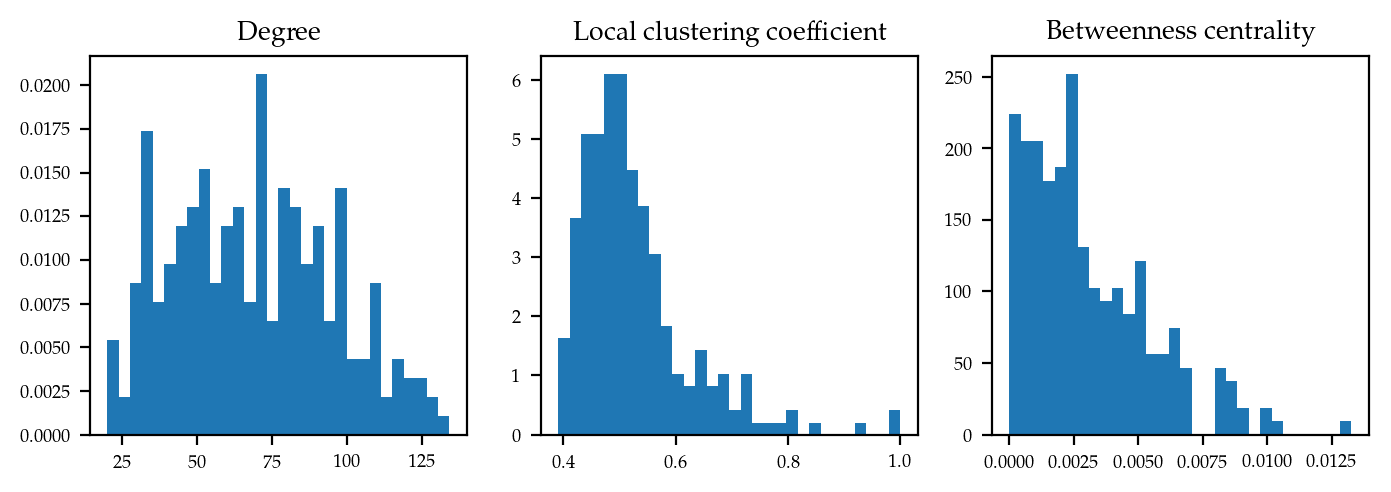

In [76]:
plt.figure(figsize=(7, 2.5))

plt.subplot(1, 3, 1)
plt.hist(degrees, 30, density=True)
plt.title('Degree')

plt.subplot(1, 3, 2)
plt.hist(clustering_coefficients, 30, density=True)
plt.title('Local clustering coefficient')

plt.subplot(1, 3, 3)
plt.hist(betweennesses, 30, density=True)
plt.title('Betweenness centrality')

plt.tight_layout()
plt.show()

### Part 1.3.3

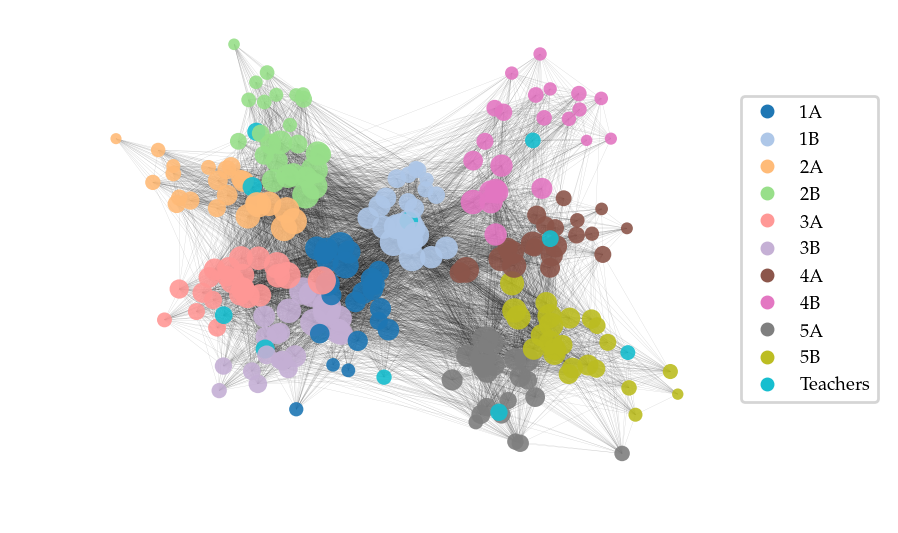

In [133]:
all_classes = {x[-1] for x in G.nodes.data('cls')}
color_map = {cls: i / len(all_classes) for i, cls in enumerate(sorted(all_classes))}
pos = nx.spring_layout(G)

plt.figure(figsize=(4, 3))
nx.draw_networkx_edges(G, pos, width=0.1, alpha=0.2)
nx.draw_networkx_nodes(G, pos,
                       node_size=[0.8*v for k, v in nx.degree(G)], 
                       node_color=[color_map[x[-1]] for x in G.nodes(data='cls')], 
                       cmap='tab20', 
                       vmin=0,
                       vmax=1,
                       linewidths=0, 
                       alpha=0.9)
for cls, c in color_map.items():
    plt.plot([], [], 'o', c=plt.cm.tab20(c), label=cls)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left')
plt.axis('off')
plt.show()